In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo

In [108]:
## SOTS data for 2023 downloaded from https://thredds.aodn.org.au/thredds/catalog/IMOS/DWM/SOTS/derived_products/gridded/catalog.html?dataset=IMOS/DWM/SOTS/derived_products/gridded/IMOS_DWM-SOTS_BCMOPSTUW_20230517_SOFS_FV02_SOFS-12-2023-hourly-gridded-product_END-20240406_C-20240629.nc
#This is a processed data product. You can also get a flux data product
fname = './data/IMOS_DWM-SOTS_BCMOPSTUW_20230517_SOFS_FV02_SOFS-12-2023-hourly-gridded-product_END-20240406_C-20240629.nc'
d0 = xr.open_dataset(fname)

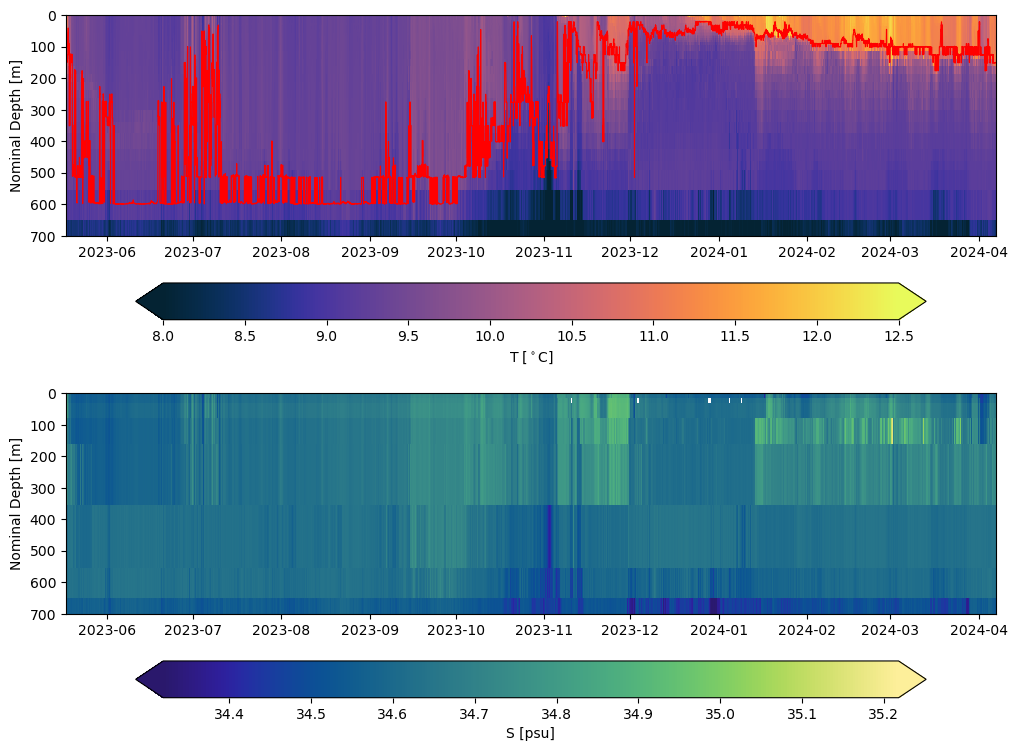

In [124]:
# Plot upper ocean variables
f, ax = plt.subplots(2,1) 
f.set_size_inches(12, 9)

## Plot Ocean Temp and Mixed Layer Depth [MLD]
A0 = ax[0].pcolormesh(d0.TIME, d0.NOMINAL_DEPTH_TEMP, d0.TEMP, cmap = cmo.thermal, vmin = 8, vmax = 12.5, shading = 'nearest')
ax[0].plot(d0.TIME, d0.MLD, 'r', linewidth = 0.8)
ax[0].set(ylim = [700, 0], ylabel = 'Nominal Depth [m]')
cbar = f.colorbar(A0, ax = ax[0], extend='both', extendfrac=0.0375, 
                   shrink = 0.85, label = r'T [$^\circ$C]', aspect = 20, orientation='horizontal' )

## Plot Ocean Temp and Mixed Layer Depth [MLD]
A1 = ax[1].pcolormesh(d0.TIME, d0.NOMINAL_DEPTH_PSAL, d0.PSAL, cmap = cmo.haline,shading = 'nearest')
ax[1].set(ylim = [700, 0], ylabel = 'Nominal Depth [m]')
cbar = f.colorbar(A1, ax = ax[1], extend='both', extendfrac=0.0375, 
                   shrink = 0.85, label = r'S [psu]', aspect = 20, orientation='horizontal' )


In [42]:
np.shape(d0.TEMP)

(35, 7806)

[(19494.666666666668, 19819.875), Text(0, 0.5, 'Wave Height [m]')]

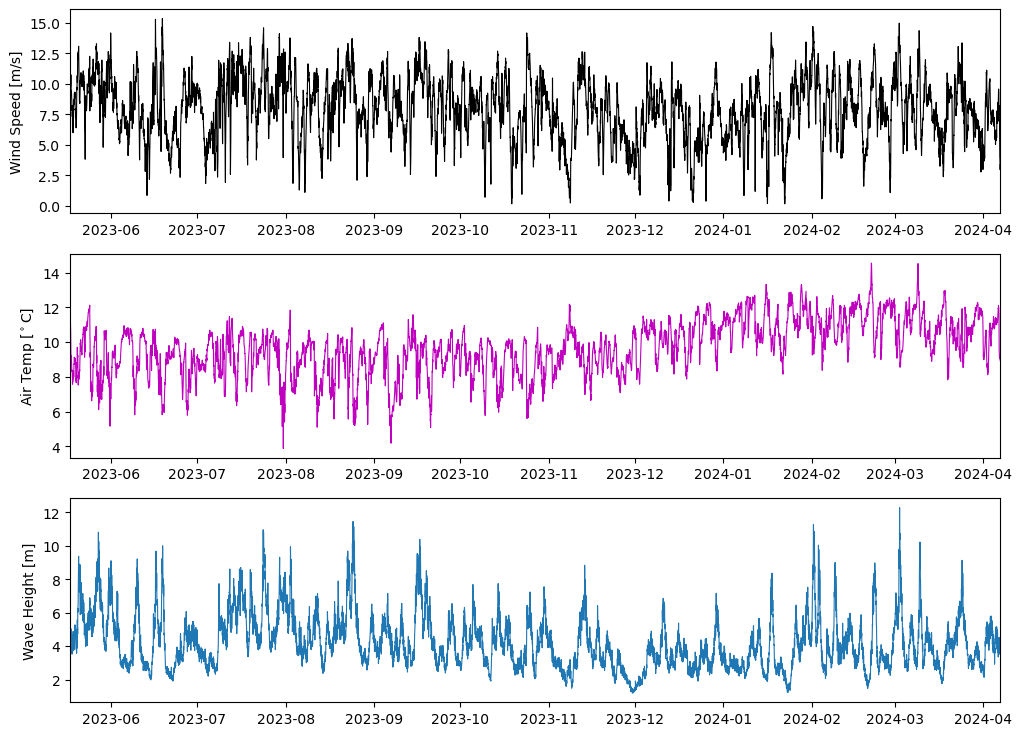

In [125]:
# Plot atmospheric vars
f, ax = plt.subplots(3,1) 
f.set_size_inches(12, 9)

## Wind speed at nominal depth of -3.495
# Calc wind speed
wind_spd = (d0.UWIND[0,:]**2+d0.VWIND[0,:]**2)**0.5
A0 = ax[0].plot(d0.TIME, wind_spd, 'k', linewidth = 0.8)
ax[0].set(xlim = [d0.TIME[0], d0.TIME[-1]], ylabel = 'Wind Speed [m/s]')

## Air temperature at nominal depth of -3.25
A1 = ax[1].plot(d0.TIME, d0.AIRT[0,:], 'm', linewidth = 0.8)
ax[1].set(xlim = [d0.TIME[0], d0.TIME[-1]], ylabel = 'Air Temp [$^\circ$C]')

## Significant wave height
A2 = ax[2].plot(d0.TIME, d0.Hm0[0,:], linewidth = 0.8)
ax[2].set(xlim = [d0.TIME[0], d0.TIME[-1]], ylabel = 'Wave Height [m]')

